In [1]:
import os
from statistics import mean
import string
from tqdm import tqdm
import csv
import pandas as pd

SRC_LANGS = ["cs", "da", "de", "en", "es", "fr", "it", "nb", "nl", "pl", "pt", "ru", "sk", "sv", "uk"]
TRG_LANGS = ["de", "es", "en", "fr", "it", "nl", "pl", "pt"]

data_dir = "all2x_deberta_classified"

count = lambda l1, l2: len(list(filter(lambda c: c in l2, l1)))

with open('statistics_50_000.tsv', 'w', newline='') as tsvfile:
    writer = csv.writer(tsvfile, delimiter='\t', lineterminator='\n')
    writer.writerow(["Formality level", "sentence_length", "punctuation", "mean_word_length", "direction", "source_language", "target_language"])
    for trg_lang in TRG_LANGS:
        print(trg_lang)
        for src_lang in tqdm(SRC_LANGS):
            if src_lang != trg_lang:
                for formality in ["formal", "informal"]:
                    data_path = os.path.join(data_dir, "quoting_fixed", f"all2{trg_lang}", f"{src_lang}-{trg_lang}.{formality}.tsv")
                    if os.path.exists(data_path):
                        with open(data_path) as data_file:
                            data = data_file.readlines()
                            for line in data:
                                trg = line.strip().split("\t")[1]
                                l = len(trg)
                                p = count(trg, set(string.punctuation))
                                w = mean([len(i) for i in trg.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation))).split()])
                                new_row = [formality, l, p, w, f"{src_lang}->{trg_lang}", src_lang, trg_lang]
                                writer.writerow(new_row)

## SENTENCES

In [ ]:
df = pd.read_csv('statistics_50_000.tsv', sep="\t")
df_copy = df.copy()
df_no_outliers = pd.DataFrame()
for metric in ["sentence_length"]:
    q1s = df.groupby(['target_language', 'Formality level'])[metric].quantile([0.25])
    q3s = df.groupby(['target_language', 'Formality level'])[metric].quantile([0.75])
    for trg_lang in TRG_LANGS:
        print(trg_lang)
        for formality_lvl in ["formal", "informal"]:
            q1 = q1s[trg_lang][formality_lvl][0.25]
            q3 = q3s[trg_lang][formality_lvl][0.75]
            iqr = q3 - q1
            tmp_df = df_copy[df_copy[metric] > q1 - (1.5 * iqr)][df_copy['target_language'] == trg_lang][df_copy['Formality level'] == formality_lvl]
            tmp_df = tmp_df[tmp_df[metric] < q3 + (1.5 * iqr)][tmp_df['target_language'] == trg_lang][tmp_df['Formality level'] == formality_lvl]
            df_no_outliers = pd.concat([df_no_outliers, tmp_df])

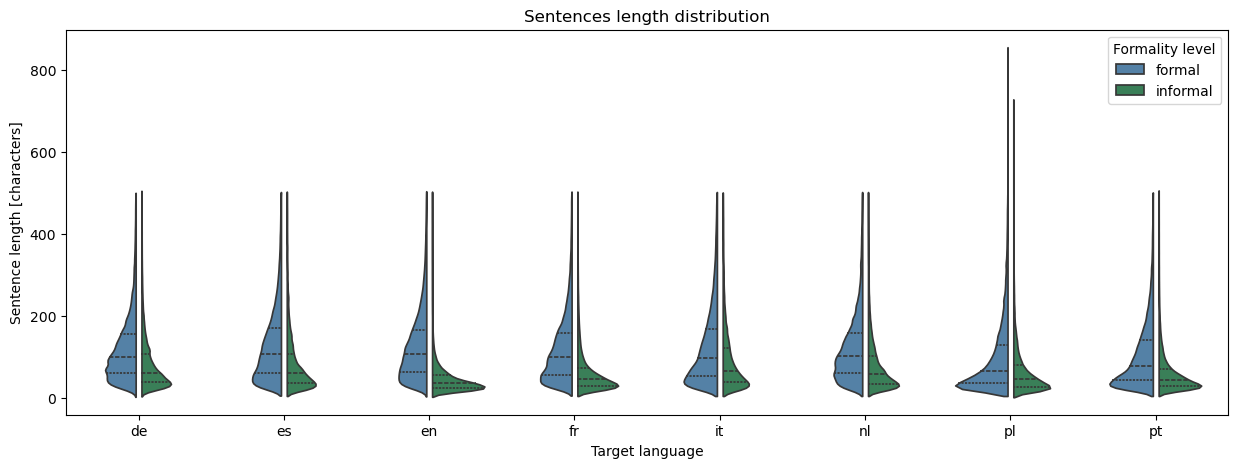

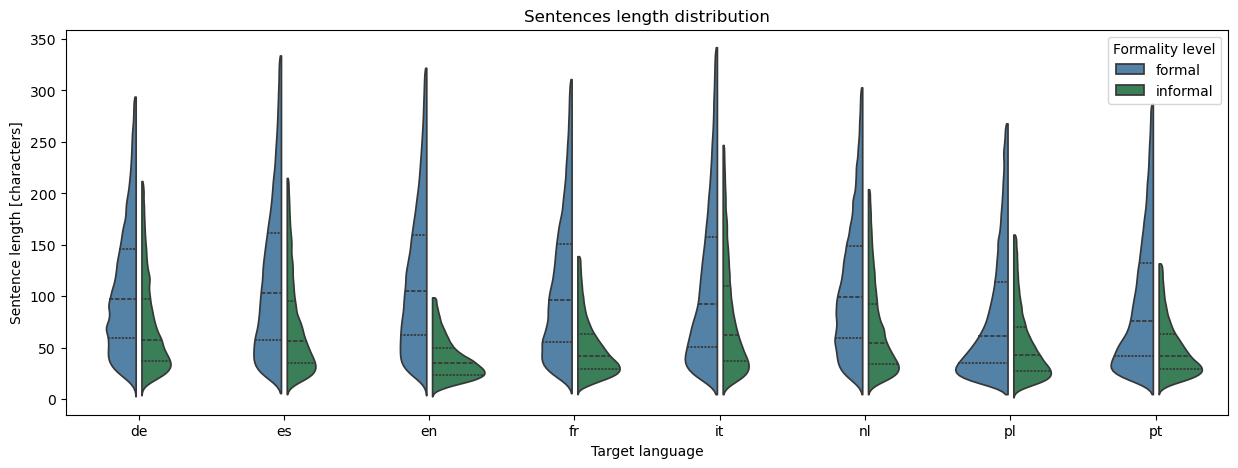

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
sns.violinplot(data = df, x = 'target_language', y = "sentence_length", hue ="Formality level", orient='v', split=True, gap=.1, inner="quart", cut=0, palette=['steelblue', 'seagreen'])
plt.xlabel("Target language")
plt.ylabel("Sentence length [characters]")
plt.title("Sentences length distribution")
plt.show()

plt.figure(figsize=(15, 5))
sns.violinplot(data = df_no_outliers, x = 'target_language', y = "sentence_length", hue ="Formality level", orient='v', split=True, gap=.1, inner="quart", cut=0, palette=['steelblue', 'seagreen'])
plt.xlabel("Target language")
plt.ylabel("Sentence length [characters]")
plt.title("Sentences length distribution")
plt.show()

## WORDS

In [ ]:
df = pd.read_csv('statistics_50_000.tsv', sep="\t")
df_copy = df.copy()
df_no_outliers = pd.DataFrame()
for metric in ["mean_word_length"]:
    q1s = df.groupby(['target_language', 'Formality level'])[metric].quantile([0.25])
    q3s = df.groupby(['target_language', 'Formality level'])[metric].quantile([0.75])
    for trg_lang in TRG_LANGS:
        print(trg_lang)
        for formality_lvl in ["formal", "informal"]:
            q1 = q1s[trg_lang][formality_lvl][0.25]
            q3 = q3s[trg_lang][formality_lvl][0.75]
            iqr = q3 - q1
            tmp_df = df_copy[df_copy[metric] > q1 - (1.5 * iqr)][df_copy['target_language'] == trg_lang][df_copy['Formality level'] == formality_lvl]
            tmp_df = tmp_df[tmp_df[metric] < q3 + (1.5 * iqr)][tmp_df['target_language'] == trg_lang][tmp_df['Formality level'] == formality_lvl]
            df_no_outliers = pd.concat([df_no_outliers, tmp_df])

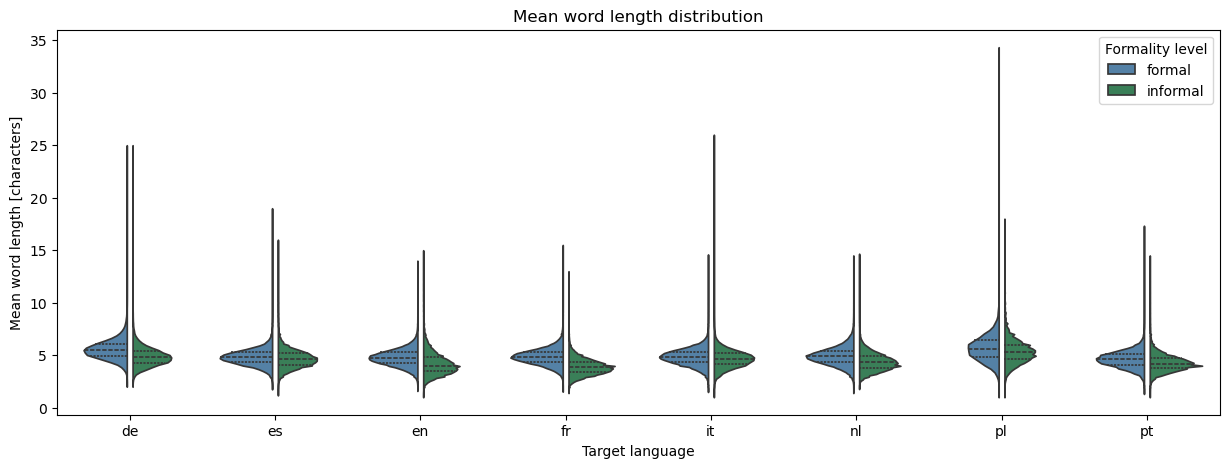

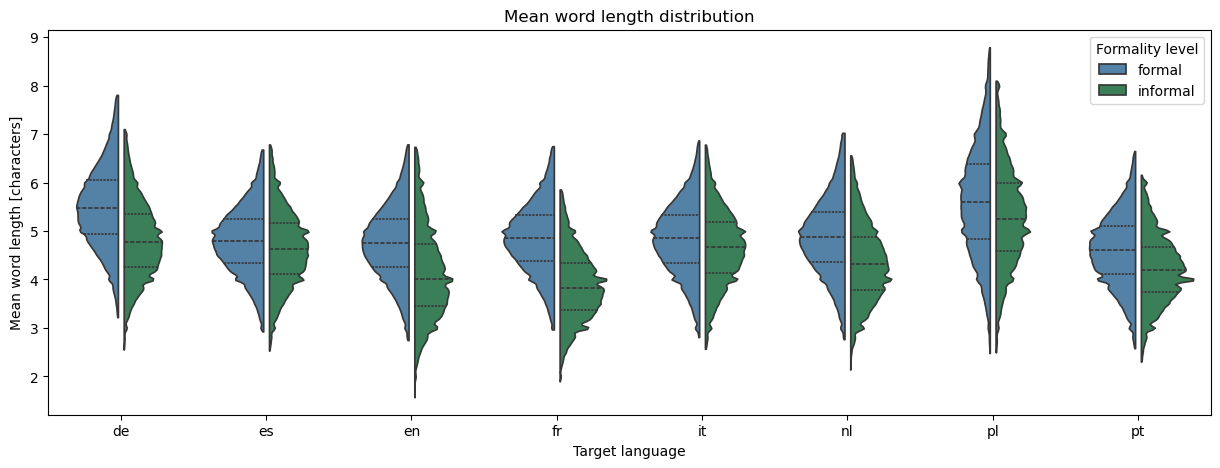

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
sns.violinplot(data = df, x = 'target_language', y = "mean_word_length", hue ="Formality level", orient='v', split=True, gap=.1, inner="quart", cut=0, palette=['steelblue', 'seagreen'])
plt.xlabel("Target language")
plt.ylabel("Mean word length [characters]")
plt.title("Mean word length distribution")
plt.show()

plt.figure(figsize=(15, 5))
sns.violinplot(data = df_no_outliers, x = 'target_language', y = "mean_word_length", hue ="Formality level", orient='v', split=True, gap=.1, inner="quart", cut=0, palette=['steelblue', 'seagreen'])
plt.xlabel("Target language")
plt.ylabel("Mean word length [characters]")
plt.title("Mean word length distribution")
plt.show()

## PUNCTUATION

In [ ]:
df = pd.read_csv('statistics_50_000.tsv', sep="\t")
df_copy = df.copy()
df_no_outliers = pd.DataFrame()
for metric in ["punctuation"]:
    q1s = df.groupby(['target_language', 'Formality level'])[metric].quantile([0.25])
    q3s = df.groupby(['target_language', 'Formality level'])[metric].quantile([0.75])
    for trg_lang in TRG_LANGS:
        for formality_lvl in ["formal", "informal"]:
            q1 = q1s[trg_lang][formality_lvl][0.25]
            q3 = q3s[trg_lang][formality_lvl][0.75]
            iqr = q3 - q1
            tmp_df = df_copy[df_copy[metric] > q1 - (1.5 * iqr)][df_copy['target_language'] == trg_lang][df_copy['Formality level'] == formality_lvl]
            tmp_df = tmp_df[tmp_df[metric] < q3 + (1.5 * iqr)][tmp_df['target_language'] == trg_lang][tmp_df['Formality level'] == formality_lvl]
            df_no_outliers = pd.concat([df_no_outliers, tmp_df])

In [ ]:
results = {}
max_punct = df_no_outliers["punctuation"].max() + 1
for trg_lang in TRG_LANGS:
    results[trg_lang] = {"formal": [0] * max_punct, "informal": [0] * max_punct}
for trg_lang in TRG_LANGS:
    for formality_lvl in ["formal", "informal"]:
        for i in range(max_punct):
            results[trg_lang][formality_lvl][i] = df_no_outliers[df_no_outliers['target_language'] == trg_lang][df_no_outliers['Formality level'] == formality_lvl][df_no_outliers['punctuation'] == i].shape[0]

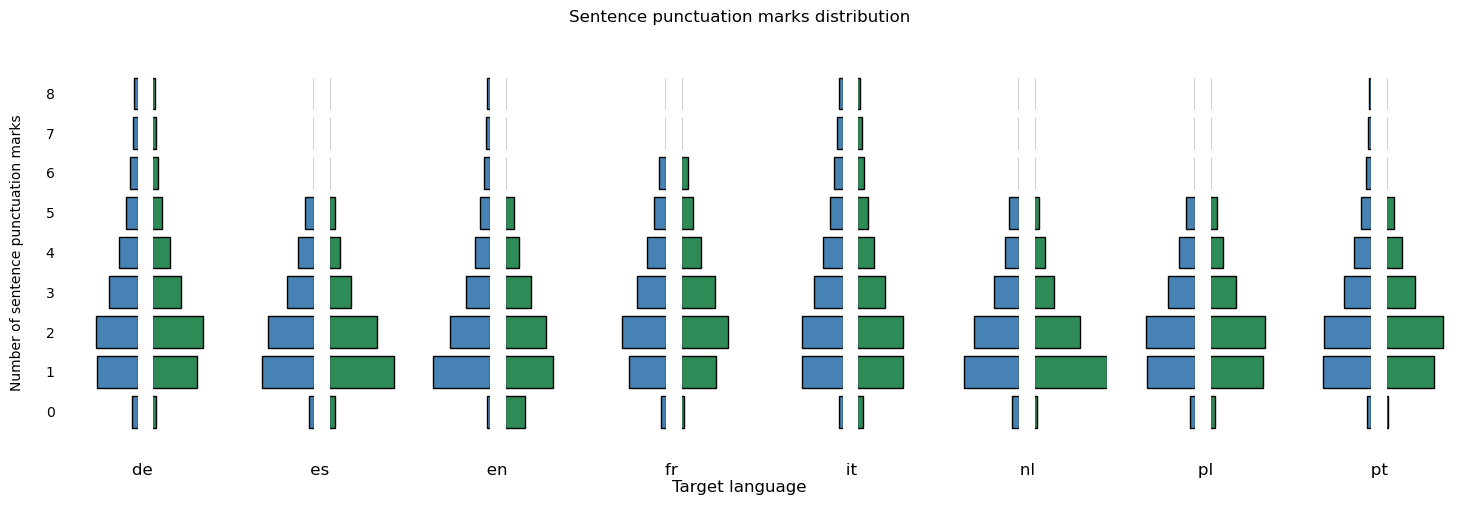

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

max_x = max([max(results[trg_lang][f_lvl]) for f_lvl in ["formal", "informal"] for trg_lang in TRG_LANGS])

punctuation_count = range(max_punct)
TRG_LANGS = ["de", "es", "en", "fr", "it", "nl", "pl", "pt"]

fig, axes = plt.subplots(figsize=(18,5), ncols=16, sharey=True)
for idx, trg_lang in enumerate(TRG_LANGS):
    axes[idx*2].barh(punctuation_count, results[trg_lang]["formal"], color='steelblue', edgecolor='black')
    axes[idx*2+1].barh(punctuation_count, results[trg_lang]["informal"], color='seagreen', edgecolor='black', capstyle='round')
    axes[idx*2].set_xlim(xmin=0, xmax=max_x)
    axes[idx*2+1].set_xlim(xmin=0, xmax=max_x)
    axes[idx*2].invert_xaxis()
    axes[idx*2].tick_params(axis='x', colors='white')
    axes[idx*2+1].tick_params(axis='x', colors='white')

for ax in axes:
    ax.tick_params(color='white', labelcolor='white')
    for spine in ax.spines.values():
        spine.set_edgecolor('white')
axes[0].tick_params(axis='y', labelcolor='black')

axes[0].set(yticks=punctuation_count, yticklabels=punctuation_count)
for i in range(16):
    axes[i].set_facecolor('white')
axes[0].set_ylabel("Number of sentence punctuation marks\n")

fig.set_edgecolor('red')
fig.suptitle("Sentence punctuation marks distribution")
fig.supxlabel('        de                              es                              en                              fr                                it                               nl                               pl                              pt\nTarget language')
plt.show()

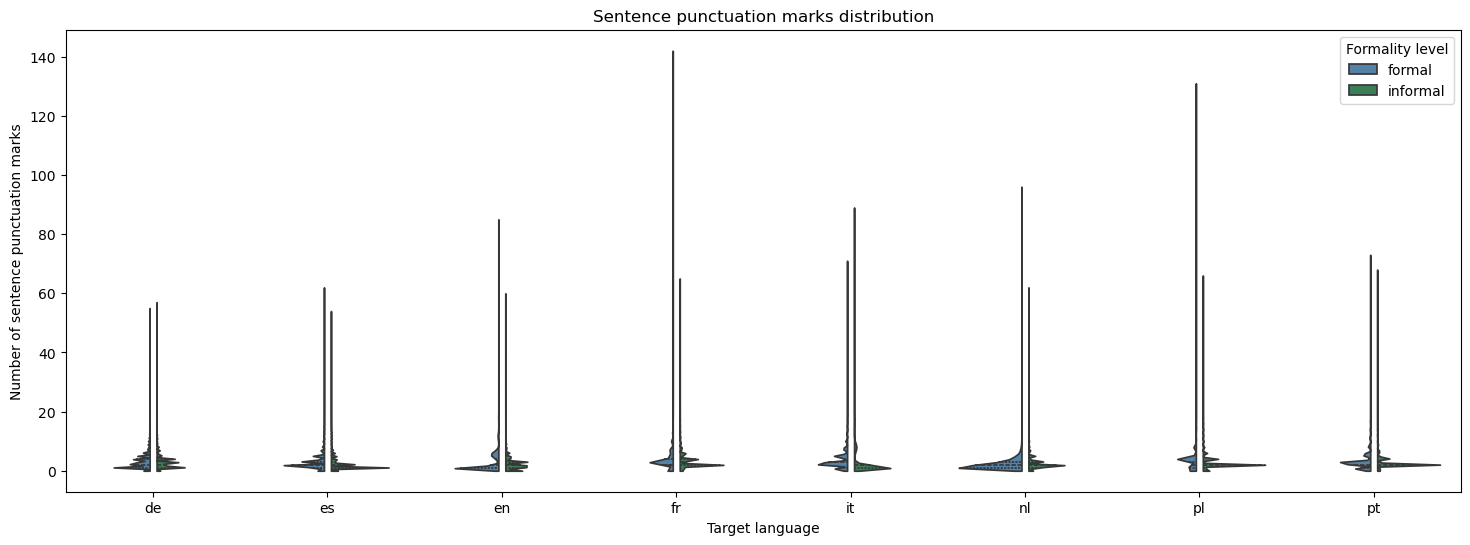

In [9]:
plt.figure(figsize=(18, 6))
sns.violinplot(data = df, x = 'target_language', y = "punctuation", hue ="Formality level", split=True, gap=.1, inner="quart", cut=0, palette=['steelblue', 'seagreen'])
plt.xlabel("Target language")
plt.ylabel("Number of sentence punctuation marks")
plt.title("Sentence punctuation marks distribution")
plt.show()

## TEXTACY

In [ ]:
!python3 -m spacy download fr_core_news_sm

In [10]:
import textacy
import pandas as pd
from textacy import text_stats as ts
from textacy.text_stats import readability

SRC_LANGS = ["cs", "fr"]
TRG_LANGS = ["en"]

formality_levels = ["formal", "informal"]

for trg_lang in TRG_LANGS:
    for src_lang in SRC_LANGS:
        if src_lang != trg_lang:
            for formality_lvl in formality_levels:
                df = pd.read_csv(f"all2x_deberta_classified/quoting_fixed/all2{trg_lang}/{src_lang}-{trg_lang}.{formality_lvl}.tsv", sep="\t", header=None, usecols=[0,1])
                doc = textacy.make_spacy_doc(" ".join(df[df.columns[1]].astype(str).values.tolist()[:5000]), lang="en_core_web_sm")
                rdblt = readability.automated_readability_index(doc)
                print(f"{src_lang}->{trg_lang}", formality_lvl, rdblt)


cs->en formal 11.175063943448336
cs->en informal 7.005223238220555
fr->en formal 12.855800108407614
fr->en informal 2.7878229544447564


In [ ]:
!python3 -m spacy download de_core_news_md
!python3 -m spacy download en_core_web_md
!python3 -m spacy download es_core_news_md
!python3 -m spacy download fr_core_news_md
!python3 -m spacy download it_core_news_md
!python3 -m spacy download nl_core_news_md
!python3 -m spacy download pt_core_news_md

In [11]:
SRC_LANGS = ["cs", "da", "de", "en", "es", "fr", "it", "nb", "nl", "pl", "pt", "ru", "sk", "sv", "uk"]
TRG_LANGS = ["en"]

formality_levels = ["formal", "informal"]

spacy_models = {
    "de": "de_core_news_md",
    "en": "en_core_web_md",
    "es": "es_core_news_md",
    "fr": "fr_core_news_md",
    "it": "it_core_news_md",
    "nl": "nl_core_news_md",
    "pt": "pt_core_news_md"
}

for trg_lang in TRG_LANGS:
    for src_lang in SRC_LANGS:
        if src_lang != trg_lang:
            for formality_lvl in formality_levels:
                df = pd.read_csv(f"all2x_deberta_classified/quoting_fixed/all2{trg_lang}/{src_lang}-{trg_lang}.{formality_lvl}.tsv", sep="\t", header=None, usecols=[0,1], on_bad_lines='warn', nrows=5_000)
                doc = textacy.make_spacy_doc(" ".join(df[df.columns[1]].astype(str).values.tolist()[:5000]), lang=spacy_models[trg_lang])
                rdblt = readability.flesch_reading_ease(doc=doc, lang=trg_lang)
                print(f"{src_lang}->{trg_lang}", formality_lvl, rdblt)
    print()

cs->en formal 63.54623043010301
cs->en informal 83.97570478179136
da->en formal 64.36574705814431
da->en informal 86.55798764451929
de->en formal 61.55782090208588
de->en informal 83.34645578463814
es->en formal 59.9809247216469
es->en informal 92.3411728438042
fr->en formal 58.576106072264565
fr->en informal 93.70719220099443
it->en formal 61.36897574946968
it->en informal 91.32353330626191
nb->en formal 68.05380844489102
nb->en informal 89.17451658825951
nl->en formal 67.1100298604771
nl->en informal 94.6009027119381
pl->en formal 65.3610575816345
pl->en informal 93.54864372522378
pt->en formal 62.0073692365964
pt->en informal 95.71578281576068
ru->en formal 60.3692462827871
ru->en informal 94.95233653600489
sk->en formal 62.26410803904733
sk->en informal 90.40672186333819
sv->en formal 65.26016481133476
sv->en informal 91.95334495129376
uk->en formal 64.75878174551366
uk->en informal 90.88089431843652

